In [1]:
pip install pandas sas7bdat


Note: you may need to restart the kernel to use updated packages.


In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from tabulate import tabulate

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

In [45]:
import pandas as pd
from sas7bdat import SAS7BDAT

# Ruta al archivo .sas7bdat
ruta_archivo = 'data/phase8_arf_2016_2021.sas7bdat'

# Leer el archivo .sas7bdat
with SAS7BDAT(ruta_archivo) as file:
    # Convertirlo en un dataframe
    df = file.to_data_frame()

# Mostrar el dataframe
df.head(5)


,ID,STATE,HISPANIC,MODECONT,PARTICIP,MODE_PRT,MM_DOB,B_ORDER,BRSTFED,CIG_1TRI,...,FRACE_MULTO_PU,PAT_RACE_PU,PAT_RACE_VT,VT_NONHISPANIC_WHITE,MAT_AGE_NAPHSIS_VT,FAGECOMB_VT,MAT_AGE_NAPHSIS_AK,FAGECOMB_AK,PAT_RACE_PU_AK,MAT_RACE_PU_AK
0,2016AK327002,AK,1.0,2.0,1.0,2.0,NaN,1.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,2.0
1,2016AK327006,AK,1.0,2.0,1.0,2.0,NaN,1.0,1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,2.0
2,2016AK327007,AK,1.0,1.0,1.0,1.0,NaN,1.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2.0,2.0
3,2016AK327009,AK,1.0,2.0,1.0,2.0,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,2.0
4,2016AK327010,AK,1.0,2.0,1.0,2.0,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,3.0


In [46]:
df_one=df.copy()

In [47]:
df['INFLIVE5_RAW'].describe()

count    215361.000000
mean          1.990936
std           0.094772
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: INFLIVE5_RAW, dtype: float64

In [48]:
df['INF_LIVE'].describe()

count    216233.000000
mean          1.991070
std           0.094077
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: INF_LIVE, dtype: float64

In [49]:
df['INFLIVE5'].describe()

count    215107.000000
mean          1.991023
std           0.094321
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: INFLIVE5, dtype: float64

In [51]:
df['PP_DEPRESS'].describe()

count    215831.000000
mean          1.143793
std           0.350881
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: PP_DEPRESS, dtype: float64

In [54]:
df['MH_PGDX8'].describe()

count    217309.000000
mean          1.155990
std           0.362847
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: MH_PGDX8, dtype: float64

In [56]:
df['VPP_DEPR_RAW'].describe()

count    194072.000000
mean          1.875211
std           0.330480
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: VPP_DEPR_RAW, dtype: float64

In [58]:
df['MH_PPINT'].describe()

count    216627.000000
mean          3.965646
std           1.102513
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: MH_PPINT, dtype: float64

In [60]:
df['MH_PPDPR'].describe()

count    216536.00000
mean          3.98065
std           0.99564
min           1.00000
25%           3.00000
50%           4.00000
75%           5.00000
max           5.00000
Name: MH_PPDPR, dtype: float64

In [62]:
# Filtrar el DataFrame
df_filtrado = df[(df['INFLIVE5_RAW'] != 2.0) & (df['INF_LIVE'] != 2.0) & (df['INFLIVE5'] != 2.0)]

# Mostrar DataFrame filtrado
df_filtrado.head(5)

,ID,STATE,HISPANIC,MODECONT,PARTICIP,MODE_PRT,MM_DOB,B_ORDER,BRSTFED,CIG_1TRI,...,FRACE_MULTO_PU,PAT_RACE_PU,PAT_RACE_VT,VT_NONHISPANIC_WHITE,MAT_AGE_NAPHSIS_VT,FAGECOMB_VT,MAT_AGE_NAPHSIS_AK,FAGECOMB_AK,PAT_RACE_PU_AK,MAT_RACE_PU_AK
83,2016AK327140,AK,1.0,1.0,1.0,1.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2.0,1.0
86,2016AK327143,AK,1.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,1.0,NaN
87,2016AK327146,AK,1.0,1.0,1.0,1.0,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,3.0
121,2016AK329029,AK,1.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,1.0
126,2016AK329034,AK,1.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1.0,1.0


In [63]:
df_filtrado.shape

(7079, 484)

In [64]:
df_filtrado['INFLIVE5_RAW'].value_counts()

INFLIVE5_RAW
1.0    1931
Name: count, dtype: int64

In [65]:
df_filtrado['INF_LIVE'].value_counts()

INF_LIVE
1.0    1931
Name: count, dtype: int64

In [66]:
df_filtrado['INFLIVE5'].value_counts()

INFLIVE5
1.0    1931
Name: count, dtype: int64

In [67]:
df_filtrado['MH_PPDPR'].describe()

count    5006.000000
mean        3.523372
std         1.222889
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: MH_PPDPR, dtype: float64

In [68]:
porcentaje_nulos = (100*df_filtrado.isna().sum()/len(df_filtrado)).to_frame()
porcentaje_nulos.sort_values(0, ascending = False)

,0
PG8_PCOS,100.000000
SMK_NICTN,100.000000
FAGECOMB_AK,99.618590
FAGECOMB_VT,99.336064
PRE_HEPB,99.138296
...,...
WTANAL,0.000000
NEST_YR,0.000000
LANGUAGE,0.000000
TYPE,0.000000


In [69]:
df =  df_filtrado

In [70]:
df_filtrado = df_filtrado.fillna(50)

In [71]:
df_filtrado['MH_PPDPR'].describe()

count    7079.000000
mean       17.133493
std        21.176350
min         1.000000
25%         3.000000
50%         4.000000
75%        50.000000
max        50.000000
Name: MH_PPDPR, dtype: float64

In [72]:
porcentaje_nulos = (100*df_filtrado.isna().sum()/len(df_filtrado)).to_frame()
porcentaje_nulos.sort_values(0, ascending = False)

,0
ID,0.0
INFLIVE5,0.0
SLP_NPAD,0.0
SLP_TOYPIL,0.0
SLP_NBLK,0.0
...,...
PAD6HUS,0.0
PAB_XHUS,0.0
PAB6HUS,0.0
DRK8_3B_RAW,0.0


In [61]:
df_filtrado['PRE_ABUS_RAW'].describe()

KeyError: 'PRE_ABUS_RAW'

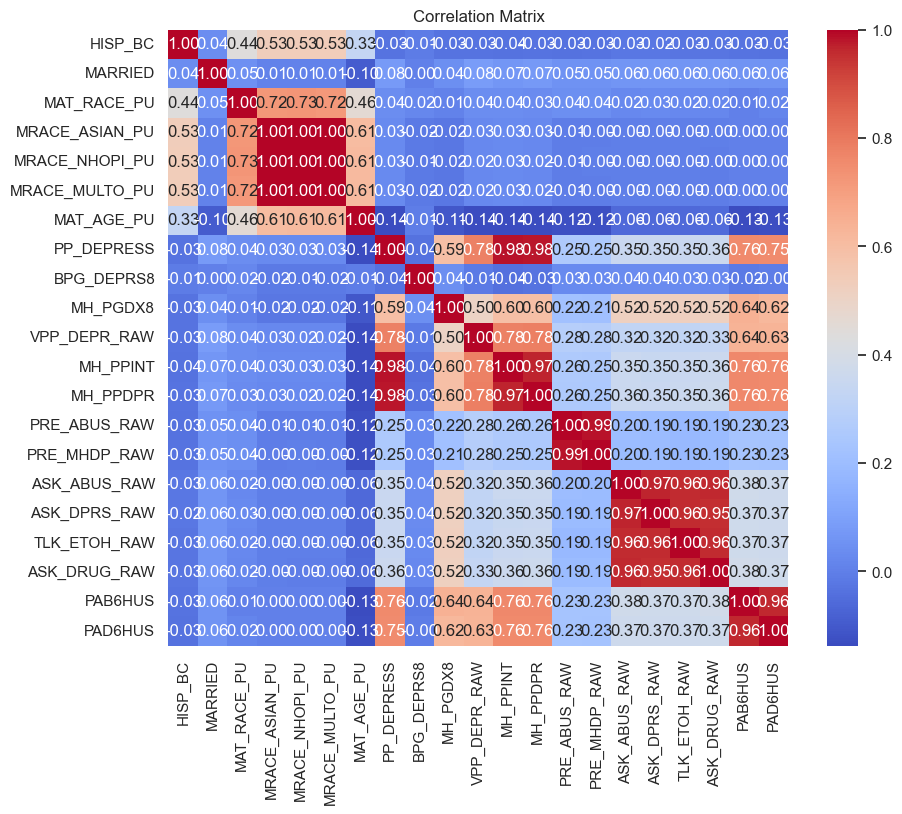

In [75]:
columnas_interes = ['HISP_BC', 'MARRIED', 'MAT_RACE_PU', 'MRACE_ASIAN_PU', 'MRACE_NHOPI_PU', 'MRACE_MULTO_PU', 'MAT_AGE_PU', 'PP_DEPRESS', 'BPG_DEPRS8', 'MH_PGDX8', 'VPP_DEPR_RAW', 'MH_PPINT', 'MH_PPDPR', 'PRE_ABUS_RAW', 'PRE_MHDP_RAW', 'ASK_ABUS_RAW', 'ASK_DPRS_RAW', 'TLK_ETOH_RAW', 'ASK_DRUG_RAW', 'PAB6HUS', 'PAD6HUS']
correlacion = df_filtrado[columnas_interes].corr()

# Configura el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crea la matriz de correlación utilizando seaborn
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")

# Añade título
plt.title('Correlation Matrix')

# Muestra la gráfica
plt.show()

MOMSMOKE:Did mom smoke? <br>
LANGUAGE:Language -- English/Spanish/Chinese<br>
MARRIED:Marital status<br>
MACROSOMIA: Macrosomia: >= 4500 gram birth weigh<br>
HISP_BC:Mother Hispanic?<br>
MAT_RACE_PU: Maternal Race grouped <br>
MRACE_ASIAN_PU: Maternal Race Asian grouped<br>
MRACE_NHOPI_PU: Maternal Race Native Hawaiian Other Pacific Islander grouped<br>
MRACE_MULTO_PU: Maternal Race Multiple/Other<br>
MAT_AGE_PU: Maternal age grouped <br>
PP_DEPRESS: VAR: POST-PARTUM DEPRESSION INDICATOR<br>
BPG_DEPRS8: Health prob -- Depression<br>
MH_PGDX8: Health prob during preg -- Depression<br>
-VPP_DEPR_RAW: PPV -- ask about depression <br>
MH_PPINT: MH -- no interest since birth<br>
MH_PPDPR: MH -- depress since birth<br>
-PRE_ABUS_RAW: Pre-preg --hurt emotional/physical<br>
-PRE_MHDP_RAW: Pre-preg --feeling down/depressed<br>
ASK_ABUS_RAW: HCW ask -- hurt emotional/physical <br>
ASK_DPRS_RAW: HCW ask -- if down/depressed<br>
TLK_ETOH_RAW: HCW ask -- if drinking alcohol<br>
ASK_DRUG_RAW: HCW ask -- using drugs<br>
PAB6HUS: Abuse -- 12 mnths b4 preg, h/p<br>
PAD6HUS: Abuse --during preg, h/p<br>

In [80]:
df['MH_PPINT'].value_counts()

MH_PPINT
5.0    1509
3.0    1269
4.0    1256
2.0     657
1.0     320
Name: count, dtype: int64

In [81]:
df['MARRIED'].value_counts()

MARRIED
1.0    3674
2.0    3398
Name: count, dtype: int64

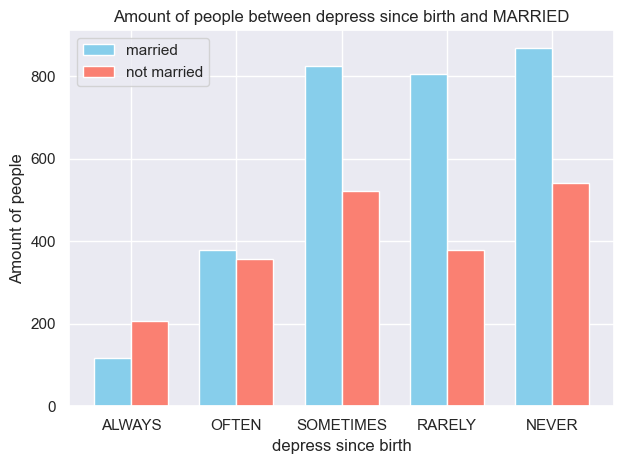

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar por MARRIED igual a 1 y 2
filtro_1 = df[df['MARRIED'] == 1]
filtro_2 = df[df['MARRIED'] == 2]

# Contar la cantidad de ocurrencias de cada valor de MH_PPINT en cada filtro
conteo_1 = filtro_1['MH_PPDPR'].value_counts().sort_index()
conteo_2 = filtro_2['MH_PPDPR'].value_counts().sort_index()

# Crear el gráfico de barras
bar_width = 0.35
index = np.arange(len(conteo_1))

plt.bar(index, conteo_1, bar_width, color='skyblue', label='married')
plt.bar(index + bar_width, conteo_2, bar_width, color='salmon', label='not married')

nombres_valores = ['ALWAYS', 'OFTEN', 'SOMETIMES', 'RARELY', 'NEVER']

plt.xlabel('depress since birth')
plt.ylabel('Amount of people')
plt.title('Amount of people between depress since birth and MARRIED')
plt.xticks(index + bar_width / 2, nombres_valores)
plt.legend()
plt.tight_layout()
plt.show()


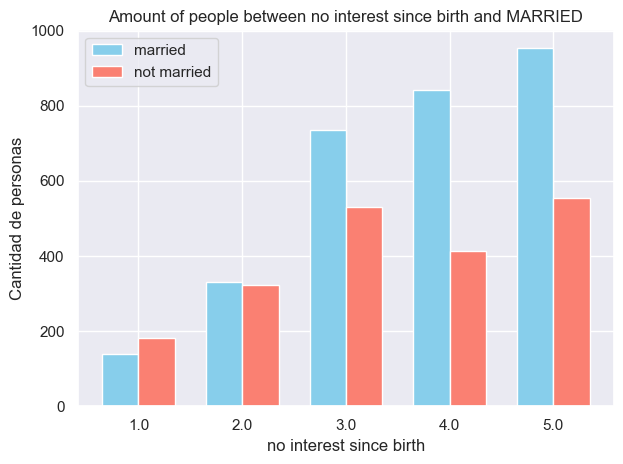

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar por MARRIED igual a 1 y 2
filtro_1 = df[df['MARRIED'] == 1]
filtro_2 = df[df['MARRIED'] == 2]

# Contar la cantidad de ocurrencias de cada valor de MH_PPINT en cada filtro
conteo_1 = filtro_1['MH_PPINT'].value_counts().sort_index()
conteo_2 = filtro_2['MH_PPINT'].value_counts().sort_index()

# Crear el gráfico de barras
bar_width = 0.35
index = np.arange(len(conteo_1))

plt.bar(index, conteo_1, bar_width, color='skyblue', label='married')
plt.bar(index + bar_width, conteo_2, bar_width, color='salmon', label='not married')

plt.xlabel('no interest since birth')
plt.ylabel('Cantidad de personas')
plt.title('Amount of people between no interest since birth and MARRIED')
plt.xticks(index + bar_width / 2, conteo_1.index)
plt.legend()
plt.tight_layout()
plt.show()
